In [26]:
import pickle
import torch as t
import numpy as np

from glob import glob
from collections import defaultdict
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [27]:
def getData(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    
    dict[b'data'] = dict[b'data'].reshape(10000, 3, 1024)
    dict[b'data'] = np.swapaxes(dict[b'data'], 1, 2)
    dict[b'data'] = dict[b'data'].reshape(10000, 32, 32, 3)
    return dict[b'data'], dict[b'labels']

In [28]:
train = defaultdict(list)
test = defaultdict(list)

# load train dataset
for file in glob('/mnt/Seagate/Code/ml-playground/cifar10/data/*[0-9]'):
    data, label = getData(file)
    if len(train['data']) == 0:
        train['data'] = data
        train['label'] = label
    else:
        train['data'] = np.concatenate((train['data'], data))
        train['label'] = np.concatenate((train['label'], label))
        
# laod test dataset
test['data'], test['label'] = getData("/mnt/Seagate/Code/ml-playground/cifar10/data/test_batch")

# load class names
with open('/mnt/Seagate/Code/ml-playground/cifar10/data/batches.meta', 'rb') as f:
    classes = pickle.load(f)['label_names']

[0]
airplane


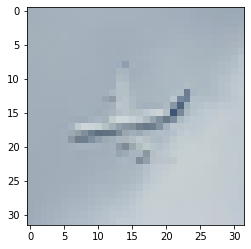

In [29]:
sampIdx = np.random.randint(low=0, high=50000, size=1)
samp = train['data'][sampIdx]
imshow(samp.squeeze())
print(train['label'][sampIdx])
print(classes[int(train['label'][sampIdx])])